In [165]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions
from mlxtend.plotting import category_scatter
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
pd.set_option('display.max_columns', None)
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_validate
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.pipeline import Pipeline
from sklearn.model_selection import KFold, StratifiedKFold

In [166]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Importing the Data

In [167]:
df = pd.read_csv(r'C:\Users\sarav\Desktop\Churn\IBM_Telecom_Dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data Overview and Cleaning

In [168]:
df.shape #rows vs columns

(7043, 21)

In [169]:
df.info() # Columns and its data type
#numerical columns - int - seniorcitizen, tenure and - float - monthlycharges, totalcharges
#total charges need to be float

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [170]:
df.isnull().sum() #checking for missing values 

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [171]:
df.duplicated().sum()#checking for duplicates

0

In [172]:
df.nunique() # To identify the unique value types in the columns

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [173]:
for col in df.dtypes[df.dtypes == object].index:
    print(col, df[col].unique()) 
# To identify the unique value types in the columns

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
TotalCharges ['29.85' '1889.5' '108.15' ... '346.45' '306.6' '6844.5']
Churn ['No' 'Yes']


In [174]:
df['TotalCharges'] #current dtype is numerical

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [175]:
#TotalCharges column should be numerical
df.TotalCharges = df.TotalCharges.astype(float)  
#ValueError: could not convert string to float: 

ValueError: could not convert string to float: 

In [176]:
#Is there any NaN values as error says string?
df["TotalCharges"].isna().sum() 

0

In [177]:
#Checking for space are blank values
df["TotalCharges"].isin([' ']).any()

True

In [178]:
#Checking for rows having space as TotalCharge
df["TotalCharges"].isin([' ']).sum() 

11

In [179]:
#what are the MonthlyCharge and Tenure when TotalCharge is a space/blank value
for i in range(len(df)):
    if df["TotalCharges"][i] == " ":
        print("Tenure is %s and Monthly charges are %s" % (df.tenure[i], df.MonthlyCharges[i]))

Tenure is 0 and Monthly charges are 52.55
Tenure is 0 and Monthly charges are 20.25
Tenure is 0 and Monthly charges are 80.85
Tenure is 0 and Monthly charges are 25.75
Tenure is 0 and Monthly charges are 56.05
Tenure is 0 and Monthly charges are 19.85
Tenure is 0 and Monthly charges are 25.35
Tenure is 0 and Monthly charges are 20.0
Tenure is 0 and Monthly charges are 19.7
Tenure is 0 and Monthly charges are 73.35
Tenure is 0 and Monthly charges are 61.9


In [180]:
#Total charges are blank when tenure is 0, may be short term customers or travellers. 
#since Tenure is zero lets consider their TotalCharges were also zero
df["TotalCharges"].replace([" "], ["0"], inplace= True)

In [181]:
#TotalCharges to numerical
df["TotalCharges"] = df.TotalCharges.astype(float)

In [182]:
df["TotalCharges"].isin(['0']).sum() 

11

## Exploratory Data Analysis

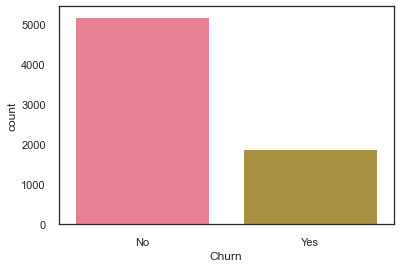

In [183]:
sns.set(style="white", palette='husl', color_codes=True)
sns.despine(left=True)
sns.countplot(df["Churn"]);

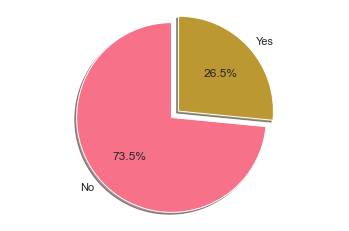

In [184]:
plt.pie(df["Churn"].value_counts(),explode=(0,0.1), autopct='%1.1f%%',
        shadow=True, startangle=90,labels=df["Churn"].unique())
plt.axis("equal") ;

In [185]:
temp_tenure = np.array(df["tenure"].tolist())
print("min: {}".format(temp_tenure.min()))
print("max: {}".format(temp_tenure.max()))

min: 0
max: 72


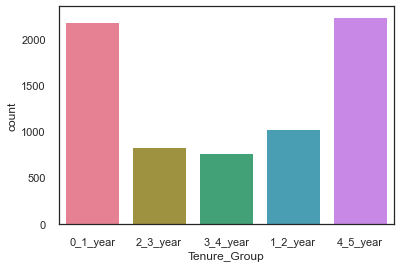

In [186]:
def tenure_to_group(df):
    if df["tenure"] <=12:
        return "0_1_year"
    elif (df["tenure"] > 12) & (df["tenure"] <= 24 ):
        return "1_2_year"
    elif (df["tenure"] > 24) & (df["tenure"] <= 36) :
        return "2_3_year"
    elif (df["tenure"] > 36) & (df["tenure"] <= 48) :
        return "3_4_year"
    elif df["tenure"] > 48 & (df["tenure"] <= 60):
        return "4_5_year"
    elif df["tenure"] > 60 & (df["tenure"] <= 72):
        return "5_6_year"
df["Tenure_Group"] = df.apply(lambda df:tenure_to_group(df),axis = 1)
sns.countplot(df["Tenure_Group"],palette='husl');

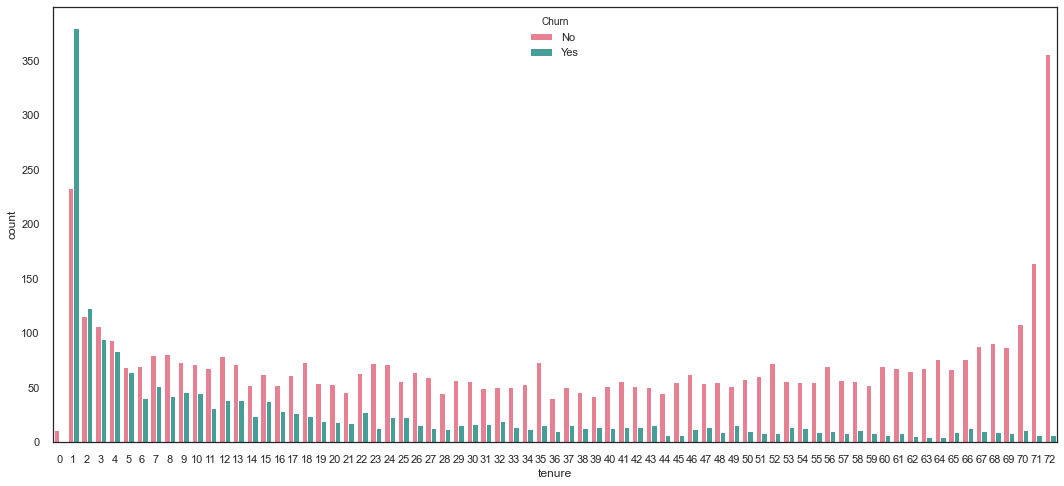

In [187]:
f, axes = plt.subplots(figsize=(18, 8))
sns.countplot(df["tenure"],hue = df["Churn"],palette='husl');

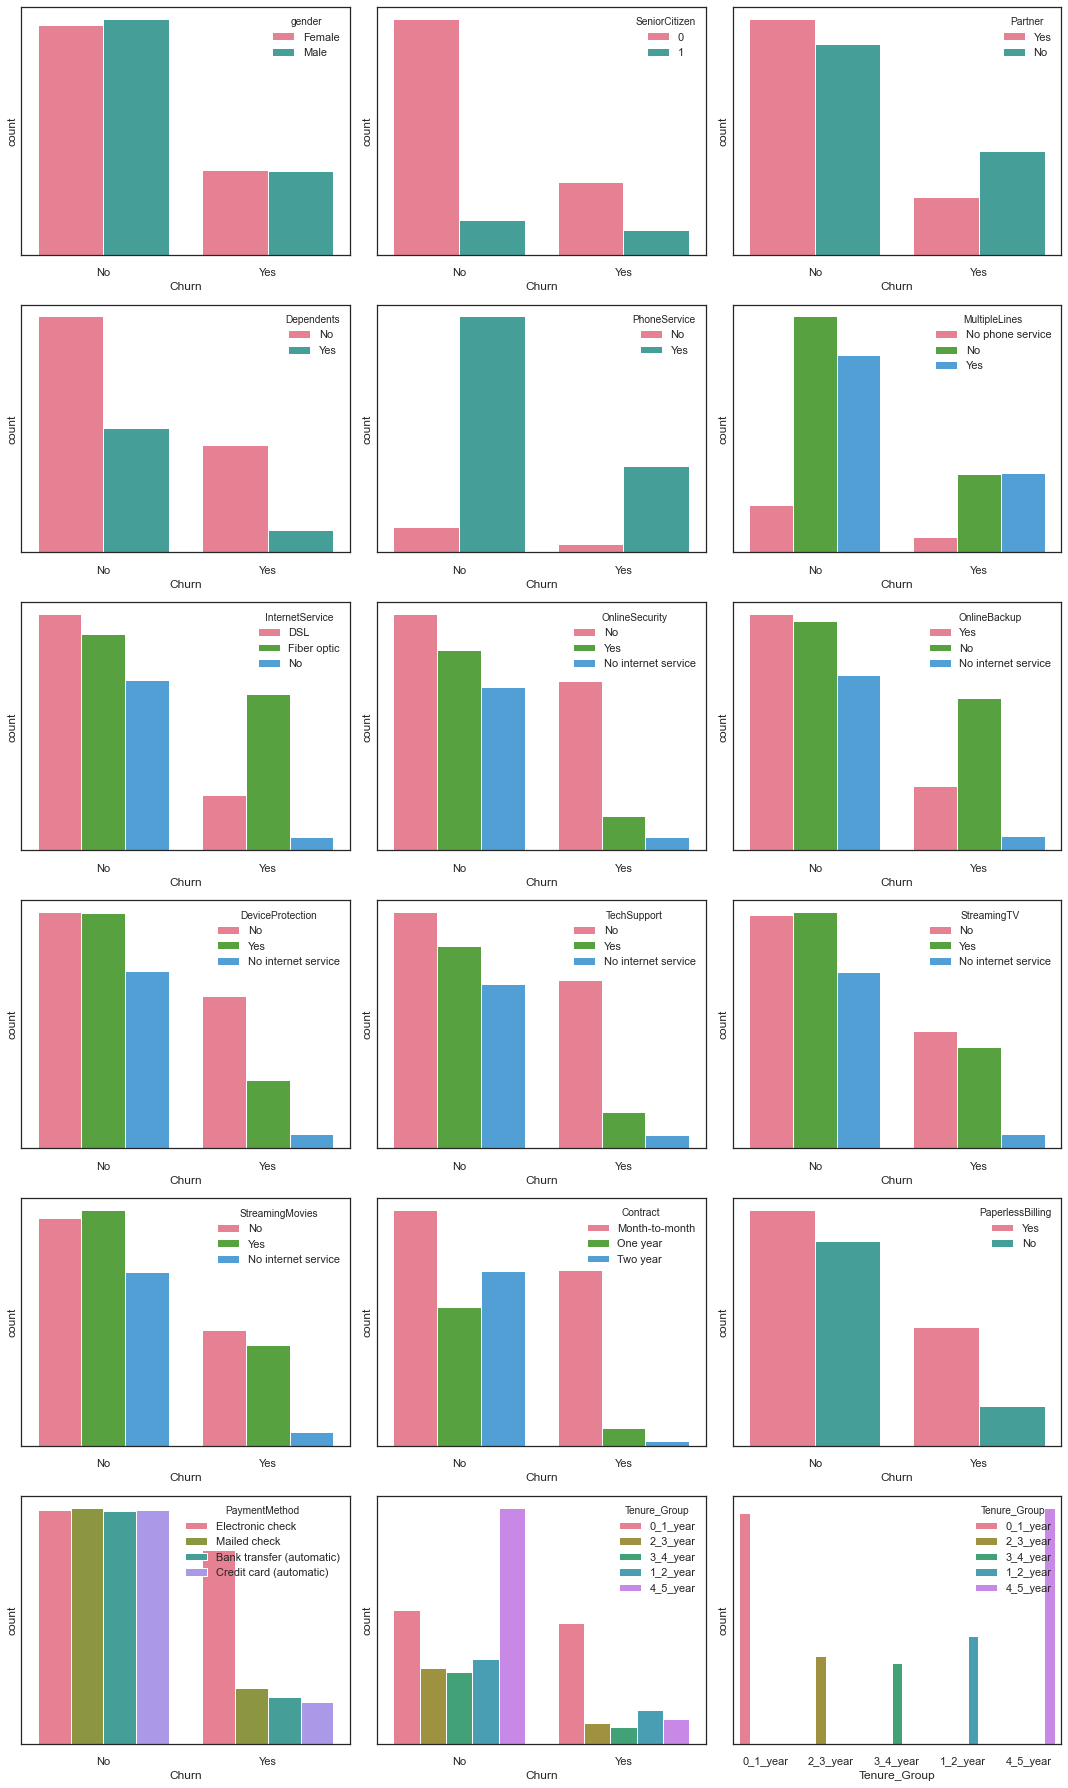

In [188]:
f, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 25))

sns.countplot(df["Churn"],hue = df["gender"],palette='husl',ax = axes[0,0])
sns.countplot(df["Churn"],hue = df["SeniorCitizen"],palette='husl',ax = axes[0,1])
sns.countplot(df["Churn"],hue = df["Partner"],palette='husl',ax = axes[0,2])
sns.countplot(df["Churn"],hue = df["Dependents"],palette='husl',ax = axes[1,0])
sns.countplot(df["Churn"],hue = df["PhoneService"],palette='husl',ax = axes[1,1])
sns.countplot(df["Churn"],hue = df["MultipleLines"],palette='husl',ax = axes[1,2])
sns.countplot(df["Churn"],hue = df["InternetService"],palette='husl',ax = axes[2,0])
sns.countplot(df["Churn"],hue = df["OnlineSecurity"],palette='husl',ax = axes[2,1])
sns.countplot(df["Churn"],hue = df["OnlineBackup"],palette='husl',ax = axes[2,2])
sns.countplot(df["Churn"],hue = df["DeviceProtection"],palette='husl',ax = axes[3,0])
sns.countplot(df["Churn"],hue = df["TechSupport"],palette='husl',ax = axes[3,1])
sns.countplot(df["Churn"],hue = df["StreamingTV"],palette='husl',ax = axes[3,2])
sns.countplot(df["Churn"],hue = df["StreamingMovies"],palette='husl',ax = axes[4,0])
sns.countplot(df["Churn"],hue = df["Contract"],palette='husl',ax = axes[4,1])
sns.countplot(df["Churn"],hue = df["PaperlessBilling"],palette='husl',ax = axes[4,2])
sns.countplot(df["Churn"],hue = df["PaymentMethod"],palette='husl',ax = axes[5,0])
sns.countplot(df["Churn"],hue = df["Tenure_Group"],palette='husl',ax = axes[5,1])
sns.countplot(df["Tenure_Group"],hue = df["Tenure_Group"],palette='husl',ax = axes[5,2]);

plt.setp(axes, yticks=[])
plt.tight_layout()


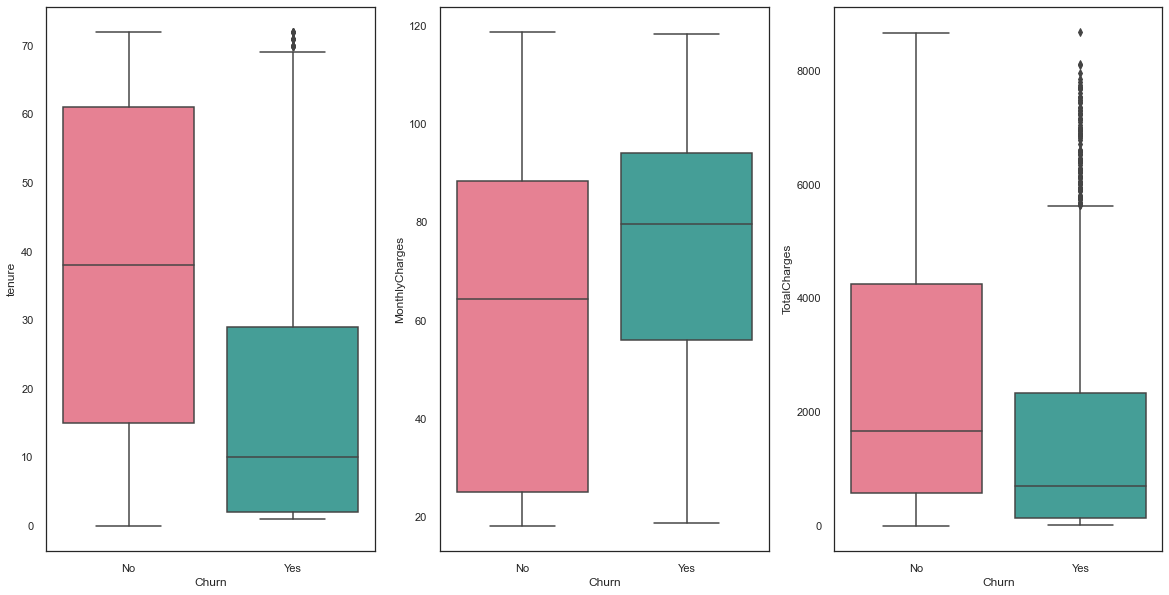

In [189]:
f, axes = plt.subplots( ncols=3, figsize=(20, 10))
sns.boxplot(x="Churn", y="tenure", data=df,palette='husl',ax = axes[0]);
sns.boxplot(x="Churn", y="MonthlyCharges", data=df,palette='husl',ax = axes[1])
sns.boxplot(x="Churn", y="TotalCharges", data=df,palette='husl',ax = axes[2]);

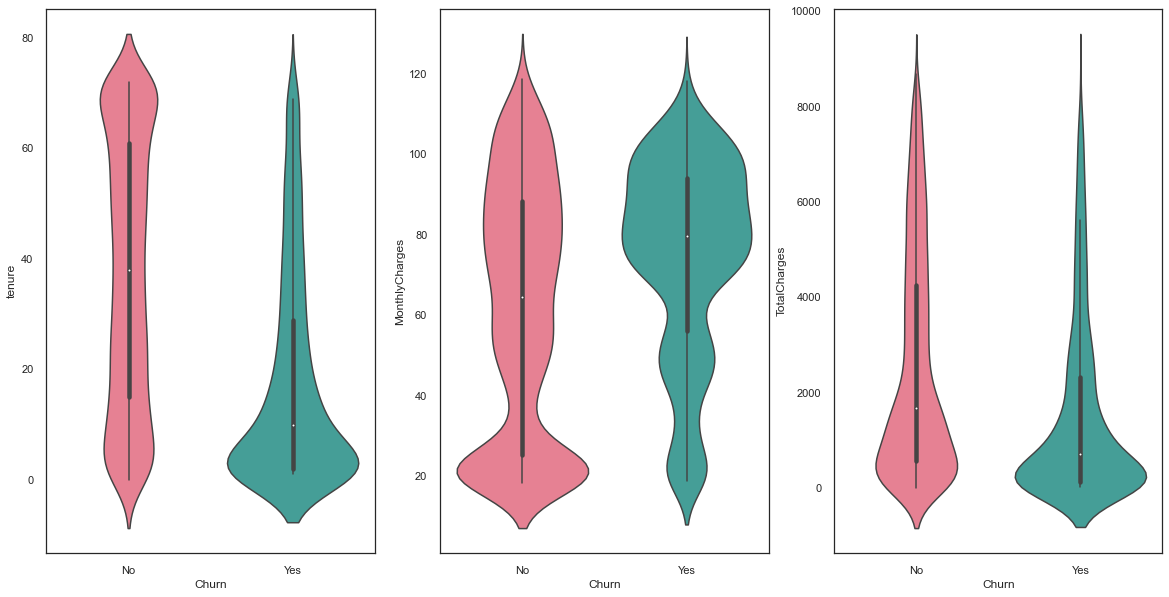

In [190]:
f, axes = plt.subplots( ncols=3, figsize=(20, 10))
sns.violinplot(x="Churn", y="tenure", data=df,palette='husl',ax = axes[0]);
sns.violinplot(x="Churn", y="MonthlyCharges", data=df,palette='husl',ax = axes[1])
sns.violinplot(x="Churn", y="TotalCharges", data=df,palette='husl',ax = axes[2]);

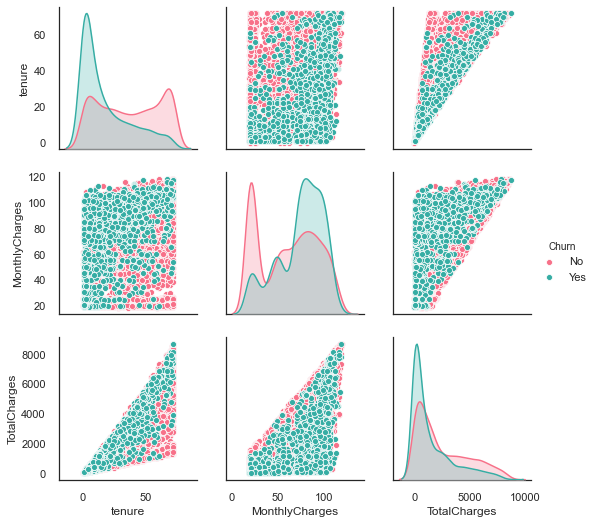

In [191]:
temp_cols = df.drop("SeniorCitizen",axis = 1)
sns.pairplot(temp_cols,hue='Churn',palette='husl');

In [192]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [193]:
df.describe().T #Transposed for easier visualization

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [194]:
df.groupby('Churn').describe().T

Churn                          No          Yes
SeniorCitizen  count  5174.000000  1869.000000
               mean      0.128721     0.254682
               std       0.334923     0.435799
               min       0.000000     0.000000
               25%       0.000000     0.000000
               50%       0.000000     0.000000
               75%       0.000000     1.000000
               max       1.000000     1.000000
tenure         count  5174.000000  1869.000000
               mean     37.569965    17.979133
               std      24.113777    19.531123
               min       0.000000     1.000000
               25%      15.000000     2.000000
               50%      38.000000    10.000000
               75%      61.000000    29.000000
               max      72.000000    72.000000
MonthlyCharges count  5174.000000  1869.000000
               mean     61.265124    74.441332
               std      31.092648    24.666053
               min      18.250000    18.850000
               25%      25.100000    56.150000
               50%      64.425000    79.650000
               75%      88.400000    94.200000
               max     118.750000   118.350000
TotalCharges   count  5174.000000  1869.000000
               mean   2549.911442  1531.796094
               std    2329.954215  1890.822994
               min       0.000000    18.850000
               25%     572.900000   134.500000
               50%    1679.525000   703.550000
               75%    4262.850000  2331.300000
               max    8672.450000  8684.800000

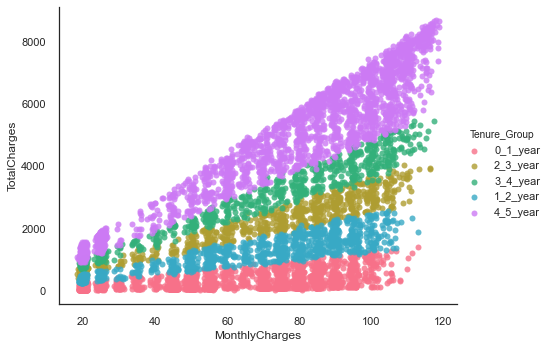

In [195]:
sns.lmplot(x = "MonthlyCharges", y= "TotalCharges", data=df,fit_reg = False,hue = "Tenure_Group",palette='husl',aspect=12/9);

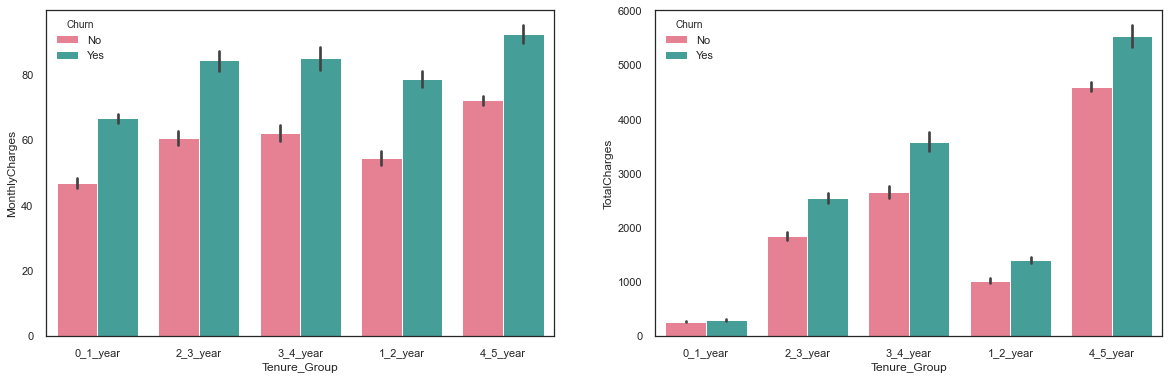

In [196]:
f, axes = plt.subplots( ncols=2, figsize=(20, 6))
sns.barplot(x='Tenure_Group',y='MonthlyCharges',data=df,palette='husl',hue = "Churn",ax = axes[0])
sns.barplot(x='Tenure_Group',y='TotalCharges',data=df,palette='husl',hue = "Churn",ax = axes[1]);

In [198]:
from pandas_profiling import ProfileReport
profile = ProfileReport(df, minimal=True)
profile.to_file(output_file="Telecom_Churn.html")

## Feature Engineering

#### Convert Categorical Values to Numeric

In [199]:
for col in df.dtypes[df.dtypes == object].index:
    print(col, df[col].unique()) 
# To identify the unique value types in categorical data columns 

customerID ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']
Tenure_Group ['0_1_year' '2_3_year' '3_4_year' '1_2_year' '4_5_year']


In [200]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
Tenure_Group           5
dtype: int64

In [201]:
#CustomerIDs are all unique and will not have any affect in customer churn
df.drop("customerID", axis= 1, inplace= True)

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null float64
Churn               7043 non-null object
Tenure_Group        7043 non-null object
dtypes: float64(2), int64(2), ob

In [203]:
##Integer encoding churn for binary classification -- The Label we will be predicting for
df["Churn"]= df["Churn"].apply(lambda x: 0 if x=='No' else 1)

In [204]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0_1_year
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,2_3_year
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,0_1_year
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3_4_year
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,0_1_year


In [205]:
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

#### Normalization of numeric datatypes

In [206]:
df["MonthlyCharges"] = df["MonthlyCharges"]/(df["MonthlyCharges"].max(axis = 0)) 

In [207]:
df["TotalCharges"] = df["TotalCharges"]/(df["TotalCharges"].max(axis = 0)) 

In [208]:
df["tenure"] = df["tenure"]/(df["tenure"].max(axis = 0)) 

In [209]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.251368,0.003437,0,0_1_year
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.479579,0.217564,0,2_3_year
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.453474,0.012453,1,0_1_year
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.356211,0.211951,0,3_4_year
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.595368,0.017462,1,0_1_year


In [210]:
#Label encode ordinal categorical data columns
label_encoder = preprocessing.LabelEncoder()
df['Tenure_Group']= label_encoder.fit_transform(df['Tenure_Group']) 
df.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_Group
0,Female,0,Yes,No,0.013889,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,0.251368,0.003437,0,0
1,Male,0,No,No,0.472222,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,0.479579,0.217564,0,2
2,Male,0,No,No,0.027778,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,0.453474,0.012453,1,0
3,Male,0,No,No,0.625000,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),0.356211,0.211951,0,3
4,Female,0,No,No,0.027778,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.595368,0.017462,1,0
5,Female,0,No,No,0.111111,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,0.839158,0.094475,1,0
6,Male,0,No,Yes,0.305556,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),0.750316,0.224461,0,1
7,Female,0,No,No,0.138889,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,0.250526,0.034762,0,0
8,Female,0,Yes,No,0.388889,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0.882526,0.350733,1,2
9,Male,0,No,Yes,0.861111,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),0.472842,0.401615,0,4


In [211]:
#One Hot Encode the nominal categorical data columns
df_ohe = pd.get_dummies(df)

In [212]:
df_ohe

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0.013889,0.251368,0.003437,0,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,0.472222,0.479579,0.217564,0,2,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,0.027778,0.453474,0.012453,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,0.625000,0.356211,0.211951,0,3,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,0.027778,0.595368,0.017462,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0.333333,0.714105,0.229194,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1
7039,0,1.000000,0.869053,0.847792,0,4,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0
7040,0,0.152778,0.249263,0.039892,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
7041,1,0.055556,0.626526,0.035303,1,0,0,1,0,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1


In [213]:
df_ohe.isnull().sum()

SeniorCitizen                              0
tenure                                     0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Tenure_Group                               0
gender_Female                              0
gender_Male                                0
Partner_No                                 0
Partner_Yes                                0
Dependents_No                              0
Dependents_Yes                             0
PhoneService_No                            0
PhoneService_Yes                           0
MultipleLines_No                           0
MultipleLines_No phone service             0
MultipleLines_Yes                          0
InternetService_DSL                        0
InternetService_Fiber optic                0
InternetService_No                         0
OnlineSecurity_No                          0
OnlineSecurity_No internet service         0
OnlineSecu

In [214]:
df_ohe.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.000000,0.000000,0.000000,0.000000,1.0
tenure,7043.0,0.449599,0.341104,0.000000,0.125000,0.402778,0.763889,1.0
MonthlyCharges,7043.0,0.545362,0.253390,0.153684,0.298947,0.592421,0.756632,1.0
TotalCharges,7043.0,0.262497,0.261007,0.000000,0.045891,0.160574,0.436003,1.0
Churn,7043.0,0.265370,0.441561,0.000000,0.000000,0.000000,1.000000,1.0
Tenure_Group,7043.0,1.977850,1.663316,0.000000,0.000000,2.000000,4.000000,4.0
gender_Female,7043.0,0.495244,0.500013,0.000000,0.000000,0.000000,1.000000,1.0
gender_Male,7043.0,0.504756,0.500013,0.000000,0.000000,1.000000,1.000000,1.0
Partner_No,7043.0,0.516967,0.499748,0.000000,0.000000,1.000000,1.000000,1.0
Partner_Yes,7043.0,0.483033,0.499748,0.000000,0.000000,0.000000,1.000000,1.0


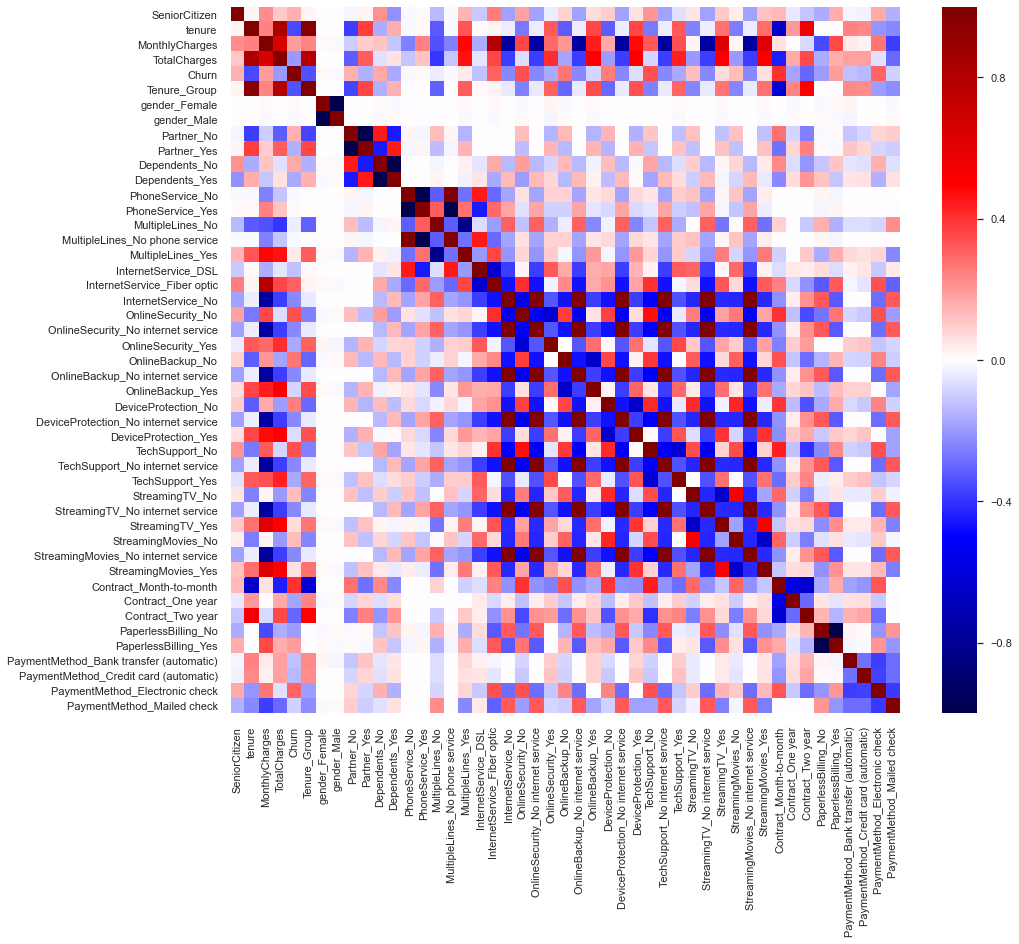

In [218]:
# Correlation Matrix
sns.set(rc={'figure.figsize':(15,13)})
sns.heatmap(df_ohe.corr(), cmap="seismic", annot=False, vmin=-1, vmax=1);


#other ideas - Have a single column for tenure group - label encode 12345
#gender
#try 01 or 0123

In [219]:
df_ohe.corr()['Churn'].sort_values()

tenure                                    -0.352229
Tenure_Group                              -0.339441
Contract_Two year                         -0.302253
InternetService_No                        -0.227890
StreamingTV_No internet service           -0.227890
TechSupport_No internet service           -0.227890
DeviceProtection_No internet service      -0.227890
StreamingMovies_No internet service       -0.227890
OnlineBackup_No internet service          -0.227890
OnlineSecurity_No internet service        -0.227890
TotalCharges                              -0.198324
PaperlessBilling_No                       -0.191825
Contract_One year                         -0.177820
OnlineSecurity_Yes                        -0.171226
TechSupport_Yes                           -0.164674
Dependents_Yes                            -0.164221
Partner_Yes                               -0.150448
PaymentMethod_Credit card (automatic)     -0.134302
InternetService_DSL                       -0.124214
PaymentMetho

In [220]:
df_ohe.corr(method="pearson")

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_Group,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,0.019987,0.001874,-0.001874,-0.016479,0.016479,0.211185,-0.211185,-0.008576,0.008576,-0.136213,-0.008576,0.142948,-0.108322,0.255338,-0.182742,0.185532,-0.182742,-0.038653,0.087952,-0.182742,0.066572,0.094810,-0.182742,0.059428,0.205620,-0.182742,-0.060625,0.049062,-0.182742,0.105378,0.034210,-0.182742,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,0.974567,-0.005106,0.005106,-0.379697,0.379697,-0.159712,0.159712,-0.008448,0.008448,-0.323088,-0.008448,0.331941,0.013274,0.019720,-0.039062,-0.263746,-0.039062,0.327203,-0.312694,-0.039062,0.360277,-0.312740,-0.039062,0.360653,-0.262143,-0.039062,0.324221,-0.245039,-0.039062,0.279756,-0.252220,-0.039062,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,0.237413,0.014569,-0.014569,-0.096848,0.096848,0.113890,-0.113890,-0.247398,0.247398,-0.338314,-0.247398,0.490434,-0.160189,0.787066,-0.763557,0.360898,-0.763557,0.296594,0.210753,-0.763557,0.441780,0.171836,-0.763557,0.482692,0.322076,-0.763557,0.338304,0.016951,-0.763557,0.629603,0.018075,-0.763557,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,0.796022,0.000080,-0.000080,-0.317504,0.317504,-0.062078,0.062078,-0.113214,0.113214,-0.396059,-0.113214,0.468504,-0.052469,0.361655,-0.375223,-0.063137,-0.375223,0.411651,-0.176276,-0.375223,0.509226,-0.188108,-0.375223,0.521983,-0.082874,-0.375223,0.431883,-0.195884,-0.375223,0.514973,-0.202188,-0.375223,0.520122,-0.444255,0.170814,0.354481,-0.158574,0.158574,0.185987,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,-0.339441,0.008612,-0.008612,0.150448,-0.150448,0.164221,-0.164221,-0.011942,0.011942,-0.032569,-0.011942,0.040102,-0.124214,0.308020,-0.227890,0.342637,-0.227890,-0.171226,0.268005,-0.227890,-0.082255,0.252481,-0.227890,-0.066160,0.337281,-0.227890,-0.164674,0.128916,-0.227890,0.063228,0.130845,-0.227890,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
Tenure_Group,0.019987,0.974567,0.237413,0.796022,-0.339441,1.000000,-0.002859,0.002859,-0.360353,0.360353,-0.151277,0.151277,-0.004299,0.004299,-0.308039,-0.004299,0.314231,0.010717,0.022459,-0.039413,-0.243736,-0.039413,0.305398,-0.298431,-0.039413,0.345692,-0.294547,-0.039413,0.341947,-0.242995,-0.039413,0.303446,-0.234435,-0.039413,0.269379,-0.239778,-0.039413,0.273923,-0.624496,0.235857,0.502351,-0.005800,0.005800,0.230527,0.221459,-0.194070,-0.225820
gender_Female,0.001874,-0.005106,0.014569,0.000080,0.008612,-0.002859,1.000000,-1.000000,-0.001808,0.001808,0.010517,-0.010517,-0.006488,0.006488,-0.004476,-0.006488,0.008414,-0.006568,0.011286,-0.006026,-0.010429,-0.006026,0.017021,-0.008191,-0.006026,0.013773,0.002988,-0.006026,0.00210

In [221]:
# store df_ohe to csv file
df_ohe.to_csv('df_ohe.csv', index=False)